In [1]:
from google.colab import files
uploaded = files.upload()


Saving crop_production.csv to crop_production.csv


In [3]:
import pandas as pd
df = pd.read_csv('crop_production.csv', encoding='utf-8')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
df = df[df['State_Name'] == "Andhra Pradesh"]

In [5]:
df['Yield'] = df['Production']/df['Area']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
203,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400.0,2600.0,0.121495
204,Andhra Pradesh,ANANTAPUR,1997,Kharif,Bajra,1400.0,500.0,0.357143
205,Andhra Pradesh,ANANTAPUR,1997,Kharif,Castor seed,1000.0,100.0,0.100000
206,Andhra Pradesh,ANANTAPUR,1997,Kharif,Cotton(lint),7300.0,9400.0,1.287671
207,Andhra Pradesh,ANANTAPUR,1997,Kharif,Dry chillies,3700.0,7100.0,1.918919
...,...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0,3.177173
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0,13.549107
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0,0.892027
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477


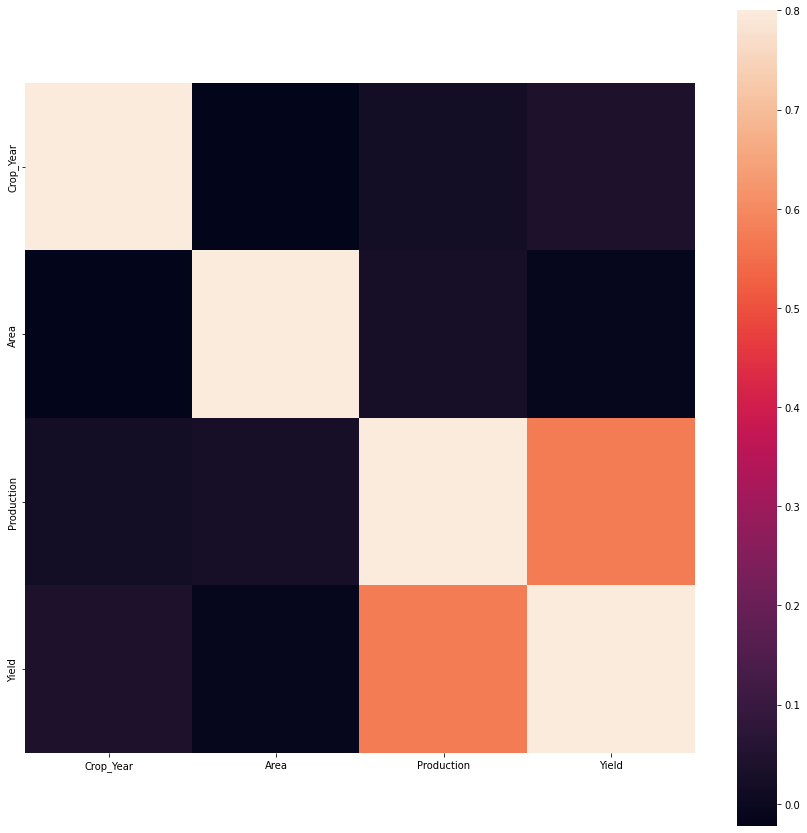

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [7]:
df = df[df['Crop_Year']>=2004]
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
493,Andhra Pradesh,ANANTAPUR,2004,Kharif,Arhar/Tur,32752.0,7893.0,0.240993
494,Andhra Pradesh,ANANTAPUR,2004,Kharif,Bajra,1021.0,403.0,0.394711
495,Andhra Pradesh,ANANTAPUR,2004,Kharif,Castor seed,1578.0,923.0,0.584918
496,Andhra Pradesh,ANANTAPUR,2004,Kharif,Cotton(lint),8933.0,7041.0,0.788201
497,Andhra Pradesh,ANANTAPUR,2004,Kharif,Dry chillies,3402.0,11288.0,3.318048
...,...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0,3.177173
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0,13.549107
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0,0.892027
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477


In [8]:
df = df.join(pd.get_dummies(df['District_Name']))
df = df.join(pd.get_dummies(df['Season']))
df = df.join(pd.get_dummies(df['Crop']))
df = df.join(pd.get_dummies(df['Crop_Year']))
df = df.join(pd.get_dummies(df['State_Name']))
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,ANANTAPUR,CHITTOOR,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,Andhra Pradesh,ANANTAPUR,2004,Kharif,Arhar/Tur,32752.0,7893.0,0.240993,1,0,...,0,0,0,0,0,0,0,0,0,1
494,Andhra Pradesh,ANANTAPUR,2004,Kharif,Bajra,1021.0,403.0,0.394711,1,0,...,0,0,0,0,0,0,0,0,0,1
495,Andhra Pradesh,ANANTAPUR,2004,Kharif,Castor seed,1578.0,923.0,0.584918,1,0,...,0,0,0,0,0,0,0,0,0,1
496,Andhra Pradesh,ANANTAPUR,2004,Kharif,Cotton(lint),8933.0,7041.0,0.788201,1,0,...,0,0,0,0,0,0,0,0,0,1
497,Andhra Pradesh,ANANTAPUR,2004,Kharif,Dry chillies,3402.0,11288.0,3.318048,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0,3.177173,0,0,...,0,0,0,0,0,0,0,0,1,1
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0,13.549107,0,0,...,0,0,0,0,0,0,0,0,1,1
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0,0.892027,0,0,...,0,0,0,0,0,0,0,0,1,1
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477,0,0,...,0,0,0,0,0,0,0,0,1,1


In [9]:
df=df.drop('District_Name', axis=1)
df = df.drop('Season',axis=1)
df = df.drop('Crop',axis=1)
df = df.drop('Crop_Year', axis=1)
df = df.drop('Production', axis=1)
df = df.drop('State_Name', axis=1)
df


,Area,Yield,ANANTAPUR,CHITTOOR,EAST GODAVARI,GUNTUR,KADAPA,KRISHNA,KURNOOL,PRAKASAM,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,32752.0,0.240993,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
494,1021.0,0.394711,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
495,1578.0,0.584918,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
496,8933.0,0.788201,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
497,3402.0,3.318048,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,28046.0,3.177173,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9827,224.0,13.549107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9828,5418.0,0.892027,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9829,21729.0,33089.005477,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [10]:
from sklearn import preprocessing

x = df[['Area']].values.astype(float)
x

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled

df['Area'] = x_scaled
df

,Area,Yield,ANANTAPUR,CHITTOOR,EAST GODAVARI,GUNTUR,KADAPA,KRISHNA,KURNOOL,PRAKASAM,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,0.037343,0.240993,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
494,0.001163,0.394711,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
495,0.001798,0.584918,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
496,0.010184,0.788201,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
497,0.003878,3.318048,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,0.031977,3.177173,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9827,0.000254,13.549107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9828,0.006177,0.892027,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9829,0.024775,33089.005477,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [11]:
df.head()

,Area,Yield,ANANTAPUR,CHITTOOR,EAST GODAVARI,GUNTUR,KADAPA,KRISHNA,KURNOOL,PRAKASAM,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,0.037343,0.240993,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
494,0.001163,0.394711,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
495,0.001798,0.584918,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
496,0.010184,0.788201,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
497,0.003878,3.318048,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
df = df.fillna(df.mean())

In [13]:
from sklearn.model_selection import train_test_split
b = df['Yield']
a = df.drop('Yield', axis = 1)

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 42)

print(a_train)
print(a_test)
print(b_train)
print(b_test)

          Area  ANANTAPUR  CHITTOOR  EAST GODAVARI  GUNTUR  KADAPA  KRISHNA  \
1711  0.000246          0         1              0       0       0        0   
5452  0.031408          0         0              0       0       0        0   
538   0.003756          1         0              0       0       0        0   
2336  0.014880          0         0              1       0       0        0   
2172  0.001397          0         0              1       0       0        0   
...        ...        ...       ...            ...     ...     ...      ...   
6278  0.001999          0         0              0       0       0        0   
8796  0.000129          0         0              0       0       0        0   
8831  0.000385          0         0              0       0       0        0   
8995  0.000344          0         0              0       0       0        0   
1644  0.000268          0         1              0       0       0        0   

      KURNOOL  PRAKASAM  SPSR NELLORE  ...  2006  2

In [14]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [16]:
   from sklearn.ensemble import RandomForestRegressor
   regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
   regr.fit(a_train, b_train)
   b_pred = regr.predict(a_test)

   from sklearn.metrics import mean_squared_error as mse
   from sklearn.metrics import mean_absolute_error as mae
   from sklearn.metrics import r2_score

   print('MSE =', mse(b_pred, b_test))
   print('MAE =', mae(b_pred, b_test))
   print('R2 Score =', r2_score(b_pred, b_test))

MSE = 344244.0619993072
MAE = 79.0739528510798
R2 Score = 0.8897409726497765


In [17]:
from sklearn.svm import SVR
regressorpoly=SVR(kernel='poly',epsilon=1.0)
regressorpoly.fit(a_train,b_train)
pred=regressorpoly.predict(a_test)
print(regressorpoly.score(a_test,b_test))
print(r2_score(b_test,b_pred))

-0.014149557561838888
0.8863535872418126


In [18]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from keras.callbacks import History 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [19]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = a_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10624     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 175,489
Trainable params: 175,489
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.callbacks import History 
history = History()
History=NN_model.fit(a_train, b_train, epochs=50, batch_size=500, validation_split = 0.2, callbacks=[history])

Epoch 1/50
7/7 [==============================] - 1s 85ms/step - loss: 233.4866 - mean_absolute_error: 233.4866 - val_loss: 219.5356 - val_mean_absolute_error: 219.5356
Epoch 2/50
7/7 [==============================] - 0s 41ms/step - loss: 233.0192 - mean_absolute_error: 233.0192 - val_loss: 219.1837 - val_mean_absolute_error: 219.1837
Epoch 3/50
7/7 [==============================] - 0s 39ms/step - loss: 232.5643 - mean_absolute_error: 232.5643 - val_loss: 218.6131 - val_mean_absolute_error: 218.6131
Epoch 4/50
7/7 [==============================] - 0s 39ms/step - loss: 231.8784 - mean_absolute_error: 231.8784 - val_loss: 217.7938 - val_mean_absolute_error: 217.7938
Epoch 5/50
7/7 [==============================] - 0s 39ms/step - loss: 231.0841 - mean_absolute_error: 231.0841 - val_loss: 216.9186 - val_mean_absolute_error: 216.9186
Epoch 6/50
7/7 [==============================] - 0s 34ms/step - loss: 230.1918 - mean_absolute_error: 230.1918 - val_loss: 215.8149 - val_mean_absolute_er

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


Text(0.5, 0, 'epoch')

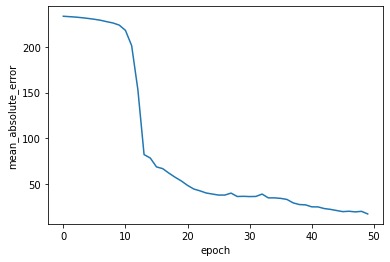

In [21]:
print(history.history.keys())
plt.plot(History.history['mean_absolute_error'])
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')

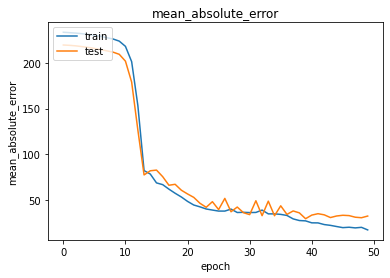

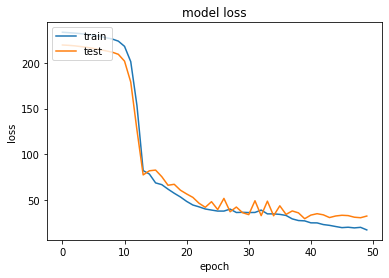

In [22]:
plt.plot(History.history['mean_absolute_error'])
plt.plot(History.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()